In [20]:
import pandas as pd
from google.colab import drive

In [21]:
# Menggunakan code ini, kita dapat me-mount Google Drive ke dalam lingkungan Colab atau Jupyter Notebook.
# Ini memungkinkan akses langsung ke file dan folder di Google Drive dalam sesi notebook.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# Ganti 'nama_file.csv' dengan nama file CSV Anda
file_path = '/content/drive/MyDrive/diamonds.csv'

# Baca file CSV menjadi dataframe
df = pd.read_csv(file_path)

# Tampilkan lima baris pertama dari dataframe
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

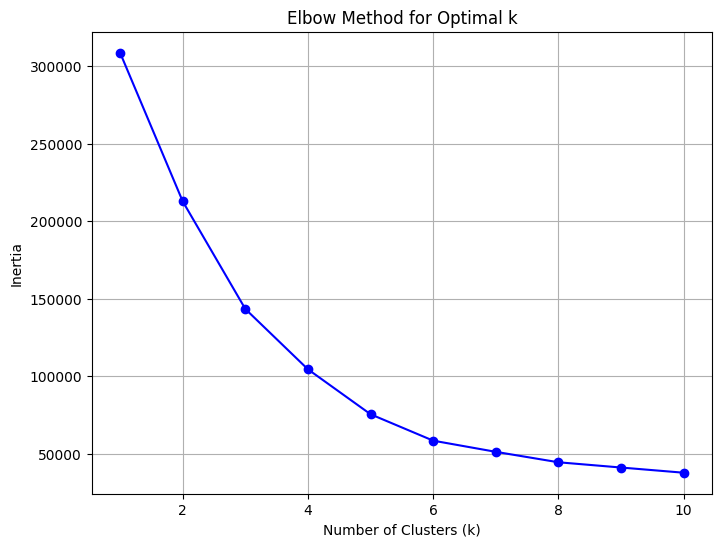

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Menginisialisasi list untuk nilai inersia (inertia)
inertia = []

# Melakukan iterasi untuk jumlah cluster dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Membuat plot elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()


In [32]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


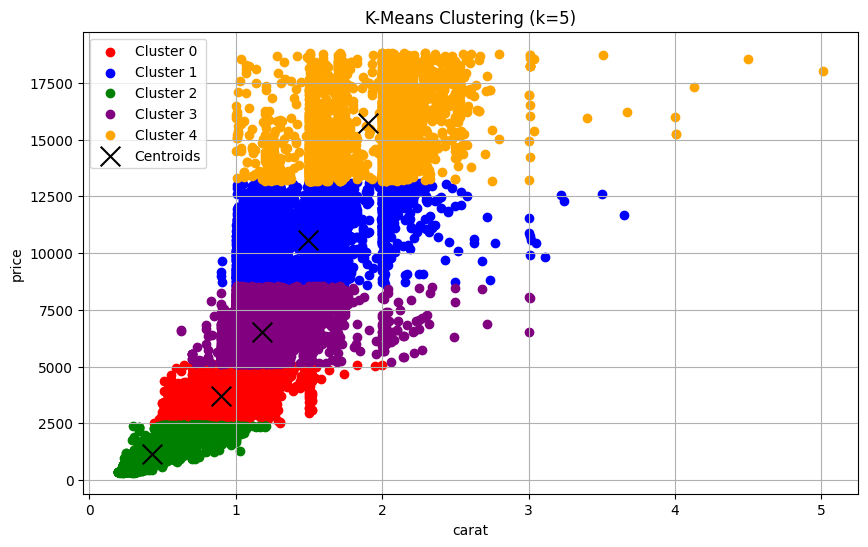

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Mengganti nama kolom pada DataFrame
df = df.rename(columns={'Unnamed: 0': 'ID'})

# Mengambil kolom yang akan digunakan
data = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']]

# Membuat model K-Means dengan jumlah cluster 5
kmeans = KMeans(n_clusters=5, random_state=0)

# Melakukan klustering
df['label'] = kmeans.fit_predict(data)

# Visualisasi berdasarkan label kluster
plt.figure(figsize=(10, 6))

# Visualisasi kluster menggunakan scatter plot
colors = ['red', 'blue', 'green', 'purple', 'orange']
for label, color in enumerate(colors):
    cluster_data = df[df['label'] == label]
    plt.scatter(cluster_data['carat'], cluster_data['price'], c=color, label=f'Cluster {label}')

# Menampilkan pusat kluster
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 3], c='black', marker='x', s=200, label='Centroids')

plt.xlabel('carat')
plt.ylabel('price')
plt.title('K-Means Clustering (k=5)')
plt.legend()
plt.grid()
plt.show()


In [39]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score


# Inisialisasi list untuk menyimpan Davies-Bouldin Index score
dbi_scores = []

# Menghitung Davies-Bouldin Index score untuk k=2 hingga k=10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    dbi = davies_bouldin_score(data, labels)
    dbi_scores.append(dbi)

# Menampilkan hasil Davies-Bouldin Index score
for k, score in zip(range(2, 11), dbi_scores):
    print(f"Davies-Bouldin Index for k={k}: {score:.4f}")



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for k=2: 0.4968
Davies-Bouldin Index for k=3: 0.4811
Davies-Bouldin Index for k=4: 0.4801
Davies-Bouldin Index for k=5: 0.5030
Davies-Bouldin Index for k=6: 0.4868
Davies-Bouldin Index for k=7: 0.4874
Davies-Bouldin Index for k=8: 0.4955
Davies-Bouldin Index for k=9: 0.4915
Davies-Bouldin Index for k=10: 0.4965


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

# Inisialisasi list untuk menyimpan Calinski-Harabasz Index score
ch_scores = []

# Menghitung Calinski-Harabasz Index score untuk k=2 hingga k=10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    ch = calinski_harabasz_score(data, labels)
    ch_scores.append(ch)

# Menampilkan hasil Calinski-Harabasz Index score
for k, score in zip(range(2, 11), ch_scores):
    print(f"Calinski-Harabasz Index for k={k}: {score:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Calinski-Harabasz Index for k=2: 89.2810
Calinski-Harabasz Index for k=3: 113.7051
Calinski-Harabasz Index for k=4: 127.9838
Calinski-Harabasz Index for k=5: 151.0439
Calinski-Harabasz Index for k=6: 166.7205
Calinski-Harabasz Index for k=7: 162.2852
Calinski-Harabasz Index for k=8: 163.5806
Calinski-Harabasz Index for k=9: 156.1551
Calinski-Harabasz Index for k=10: 152.2643


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Inisialisasi list untuk menyimpan Silhouette Score
silhouette_scores = []

# Menghitung Silhouette Score untuk k=2 hingga k=10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)

# Menampilkan hasil Silhouette Score
for k, score in zip(range(2, 11), silhouette_scores):
    print(f"Silhouette Score for k={k}: {score:.4f}")


Silhouette Score for k=2: 0.7079
Silhouette Score for k=3: 0.6603
Silhouette Score for k=4: 0.6500
Silhouette Score for k=5: 0.6217
Silhouette Score for k=6: 0.6104
Silhouette Score for k=7: 0.6139
Silhouette Score for k=8: 0.6102
Silhouette Score for k=9: 0.6035
Silhouette Score for k=10: 0.5977


In [42]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Mengganti nama kolom pada DataFrame
df = df.rename(columns={'Unnamed: 0': 'ID'})

# Mengambil kolom yang akan digunakan
data = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']]

# Inisialisasi list untuk menyimpan Davies-Bouldin Index score
dbi_scores = []

# Menghitung Davies-Bouldin Index score untuk k=2 hingga k=10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    dbi = davies_bouldin_score(data, labels)
    dbi_scores.append(dbi)

# Menampilkan hasil Davies-Bouldin Index score
for k, score in zip(range(2, 11), dbi_scores):
    print(f"Davies-Bouldin Index for k={k}: {score:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for k=2: 0.4968
Davies-Bouldin Index for k=3: 0.4811
Davies-Bouldin Index for k=4: 0.4801
Davies-Bouldin Index for k=5: 0.5030
Davies-Bouldin Index for k=6: 0.4868
Davies-Bouldin Index for k=7: 0.4874
Davies-Bouldin Index for k=8: 0.4955
Davies-Bouldin Index for k=9: 0.4915
Davies-Bouldin Index for k=10: 0.4965
